RESULT FOR UNIGRAM WITH STOP WORDS (Tfidf)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


Validation result for 1000 features
null accuracy: 75.00%
accuracy score: 72.22%
model is 2.78% less accurate than null accuracy
train and test time: 0.12%
--------------------------------------------------------------------------------
Validation result for 1500 features
null accuracy: 75.00%
accuracy score: 77.78%
model is 2.78% more accurate than null accuracy
train and test time: 0.13%
--------------------------------------------------------------------------------
Validation result for 2000 features
null accuracy: 75.00%
accuracy score: 77.78%
model is 2.78% more accurate than null accuracy
train and test time: 0.12%
-----------------------------------------------------------

null accuracy: 75.00%
accuracy score: 77.78%
model is 2.78% more accurate than null accuracy
train and test time: 0.59%
--------------------------------------------------------------------------------
Validation result for 2500 features
null accuracy: 75.00%
accuracy score: 77.78%
model is 2.78% more accurate than null accuracy
train and test time: 0.41%
--------------------------------------------------------------------------------
Validation result for 3000 features
null accuracy: 75.00%
accuracy score: 77.78%
model is 2.78% more accurate than null accuracy
train and test time: 0.30%
--------------------------------------------------------------------------------
Validation result for 3500 features
null accuracy: 75.00%
accuracy score: 77.78%
model is 2.78% more accurate than null accuracy
train and test time: 0.58%
--------------------------------------------------------------------------------
Validation result for 4000 features
null accuracy: 75.00%
accuracy score: 77.78%
model i

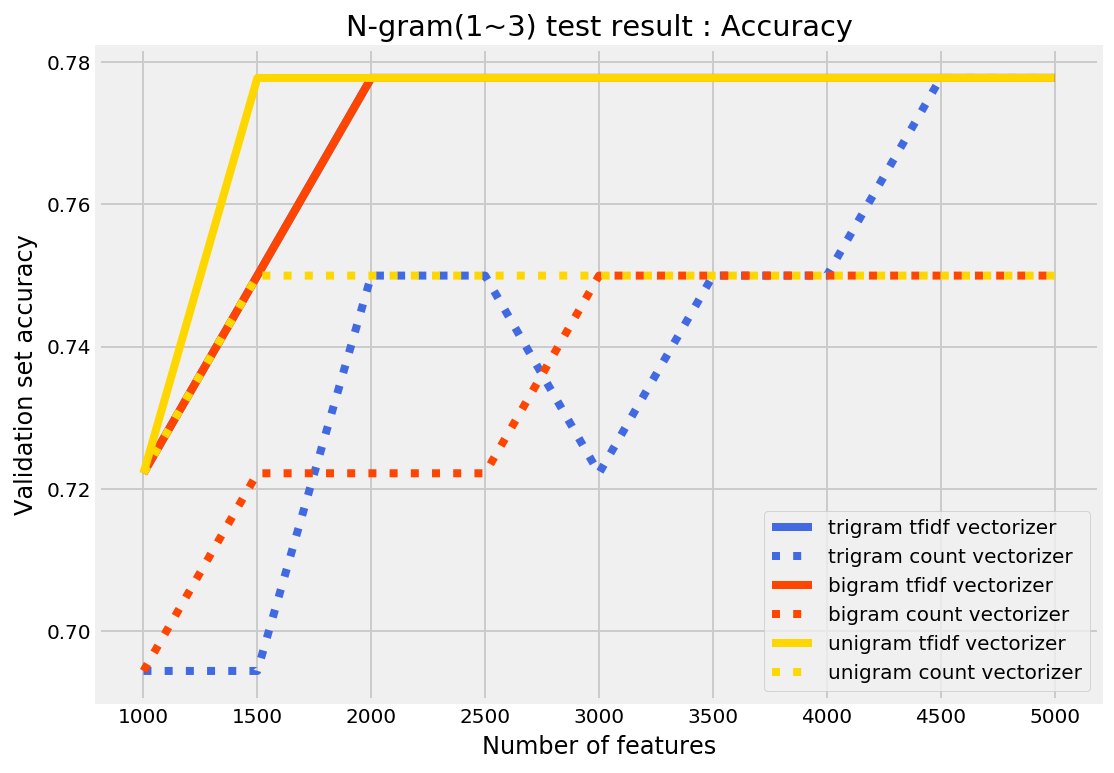

In [124]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from time import time
from sklearn.feature_extraction.text import CountVectorizer

plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
csv = 'MainDataSet_final_labeled_complete.csv'
df = pd.read_csv(csv,index_col=0)
df = df.dropna()
df.head()
x = df.tweet
y = df.label
SEED = 2000
x_train, x_validation_and_test, y_train, y_validation_and_test = train_test_split(x, y, test_size=.02, random_state=SEED)
x_validation, x_test, y_validation, y_test = train_test_split(x_validation_and_test, y_validation_and_test, test_size=.5, random_state=SEED)


def accuracy_summary(pipeline, x_train, y_train, x_test, y_test):
    if len(x_test[y_test == 0]) / (len(x_test)*1.) > 0.5:
        null_accuracy = len(x_test[y_test == 0]) / (len(x_test)*1.)
    else:
        null_accuracy = 1. - (len(x_test[y_test == 0]) / (len(x_test)*1.))
    t0 = time()
    sentiment_fit = pipeline.fit(x_train, y_train)
    y_pred = sentiment_fit.predict(x_test)
    train_test_time = time() - t0
    accuracy = accuracy_score(y_test, y_pred)
    print ("null accuracy: {0:.2f}%".format(null_accuracy*100))
    print ("accuracy score: {0:.2f}%".format(accuracy*100))
    if accuracy > null_accuracy:
        print ("model is {0:.2f}% more accurate than null accuracy".format((accuracy-null_accuracy)*100))
    elif accuracy == null_accuracy:
        print ("model has the same accuracy with the null accuracy")
    else:
        print ("model is {0:.2f}% less accurate than null accuracy".format((null_accuracy-accuracy)*100))
    print ("train and test time: {0:.2f}%".format(train_test_time))
    print ("-"*80)
    return accuracy, train_test_time
cvec = CountVectorizer()
lr = LogisticRegression()
n_features = np.arange(1000,5001,500)

def nfeature_accuracy_checker(vectorizer=cvec, n_features=n_features, stop_words='english', ngram_range=(1, 1), classifier=lr):
    result = []
    print (classifier)
    print ("\n")
    for n in n_features:
        vectorizer.set_params(stop_words=stop_words, max_features=n, ngram_range=ngram_range)
        checker_pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', classifier)
        ])
        print ("Validation result for {} features".format(n))
        nfeature_accuracy,tt_time = accuracy_summary(checker_pipeline, x_train, y_train, x_validation, y_validation)
        result.append((n,nfeature_accuracy,tt_time))
    return result
#tfidf
from sklearn.feature_extraction.text import TfidfVectorizer
tvec = TfidfVectorizer()

print ("RESULT FOR UNIGRAM WITH STOP WORDS (Tfidf)\n")
feature_result_ugt = nfeature_accuracy_checker(vectorizer=tvec)
print ("RESULT FOR UNIGRAM WITH STOP WORDS (count vectorizer)\n")
feature_result_ug = nfeature_accuracy_checker()
print ("RESULT FOR TRIGRAM WITH STOP WORDS (Tfidf)\n")
feature_result_tgt = nfeature_accuracy_checker(vectorizer=tvec,ngram_range=(1, 3))
print ("RESULT FOR BIGRAM WITH STOP WORDS (Tfidf)\n")
feature_result_bgt = nfeature_accuracy_checker(vectorizer=tvec,ngram_range=(1, 2))
print ("RESULT FOR BIGRAM WITH STOP WORDS (count vectorizer)\n")
feature_result_bg = nfeature_accuracy_checker(ngram_range=(1, 2))
print ("RESULT FOR TRIGRAM WITH STOP WORDS (count vectorizer)\n")
feature_result_tg = nfeature_accuracy_checker(ngram_range=(1, 3))
nfeatures_plot_ug = pd.DataFrame(feature_result_ug,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_tgt = pd.DataFrame(feature_result_tgt,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_bgt = pd.DataFrame(feature_result_bgt,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_ugt = pd.DataFrame(feature_result_ugt,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_tg = pd.DataFrame(feature_result_tg,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_bg = pd.DataFrame(feature_result_bg,columns=['nfeatures','validation_accuracy','train_test_time'])
plt.figure(figsize=(8,6))
plt.plot(nfeatures_plot_tgt.nfeatures, nfeatures_plot_tgt.validation_accuracy,label='trigram tfidf vectorizer',color='royalblue')
plt.plot(nfeatures_plot_tg.nfeatures, nfeatures_plot_tg.validation_accuracy,label='trigram count vectorizer',linestyle=':', color='royalblue')
plt.plot(nfeatures_plot_bgt.nfeatures, nfeatures_plot_bgt.validation_accuracy,label='bigram tfidf vectorizer',color='orangered')
plt.plot(nfeatures_plot_bg.nfeatures, nfeatures_plot_bg.validation_accuracy,label='bigram count vectorizer',linestyle=':',color='orangered')
plt.plot(nfeatures_plot_ugt.nfeatures, nfeatures_plot_ugt.validation_accuracy, label='unigram tfidf vectorizer',color='gold')
plt.plot(nfeatures_plot_ug.nfeatures, nfeatures_plot_ug.validation_accuracy, label='unigram count vectorizer',linestyle=':',color='gold')
plt.title("N-gram(1~3) test result : Accuracy")
plt.xlabel("Number of features")
plt.ylabel("Validation set accuracy")
plt.legend()





ValueError: could not convert string to float: 'sir u r helpless manmaine apko complaint kiya to apke admi mujhe marne ki dhamki de rahehyshi sushashan hi hate u alland sir mai kisi ko maf nai karungai m doing my worknth elsetcsir happy bdayi will not msz u againtc '

In [125]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import Perceptron
from sklearn.neighbors import NearestCentroid
from sklearn.feature_selection import SelectFromModel

names = ["Logistic Regression", "Linear SVC", "LinearSVC with L1-based feature selection","Multinomial NB", 
         "Bernoulli NB", "Ridge Classifier", "AdaBoost", "Perceptron","Passive-Aggresive", "Nearest Centroid"]
classifiers = [
    LogisticRegression(),
    LinearSVC(),
    Pipeline([
  ('feature_selection', SelectFromModel(LinearSVC(penalty="l1", dual=False))),
  ('classification', LinearSVC(penalty="l2"))]),
    MultinomialNB(),
    BernoulliNB(),
    RidgeClassifier(),
    AdaBoostClassifier(),
    Perceptron(),
    PassiveAggressiveClassifier(),
    NearestCentroid()
    ]
zipped_clf = zip(names,classifiers)

In [126]:
tvec = TfidfVectorizer()
cvec = CountVectorizer()
def classifier_comparator(vectorizer=tvec, n_features=1000, stop_words='english', ngram_range=(1, 1), classifier=zipped_clf):
    result = []
    vectorizer.set_params(stop_words=stop_words, max_features=n_features, ngram_range=ngram_range)
    for n,c in classifier:
        checker_pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', c)
        ])
        print ("Validation result for {}".format(n))
        print("\n {}".format(c))
        
        clf_accuracy,tt_time = accuracy_summary(checker_pipeline, x_train, y_train, x_validation, y_validation)
        result.append((n,clf_accuracy,tt_time))
    return result

In [127]:
from sklearn.svm import LinearSVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import Perceptron
from sklearn.neighbors import NearestCentroid
from sklearn.feature_selection import SelectFromModel

In [128]:
%%time
print("biigram ressult for n = 10000 without stop words")
trigram_result = classifier_comparator(n_features=10000,ngram_range=(1,2))

biigram ressult for n = 10000 without stop words
Validation result for Logistic Regression

 LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
null accuracy: 75.00%
accuracy score: 77.78%
model is 2.78% more accurate than null accuracy
train and test time: 0.30%
--------------------------------------------------------------------------------
Validation result for Linear SVC

 LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)
null accuracy: 75.00%
accuracy score: 77.78%
model is 2.78% more accurate than null accuracy
train and test time: 0.35%
-----------------------------------------------------------------------

In [92]:
%%time
bigram_result = classifier_comparator(n_features=10000,ngram_range=(1,2))

Validation result for Logistic Regression

 LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
null accuracy: 75.00%
accuracy score: 72.22%
model is 2.78% less accurate than null accuracy
train and test time: 0.50%
--------------------------------------------------------------------------------
Validation result for Linear SVC

 LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)
null accuracy: 75.00%
accuracy score: 72.22%
model is 2.78% less accurate than null accuracy
train and test time: 0.61%
--------------------------------------------------------------------------------
Validation result for LinearSVC with L1

In [79]:
trigram_result = classifier_comparator(n_features=100000,ngram_range=(1,1))

In [ ]:
from sklearn.feature_extraction import text


In [ ]:
from collections import Counter
from itertools import chain

import pandas as pd

from nltk import word_tokenize, pos_tag

df = pd.read_csv('MainDataSet_final_labeled_complete.csv', delimiter=';')
df.columns = ['sent', 'tag']

tok_and_tag = lambda x: pos_tag(word_tokenize(x))

df['lower_sent'] = df['sent'].apply(str.lower)
df['tagged_sent'] = df['lower_sent'].apply(tok_and_tag)

possible_tags = sorted(set(list(zip(*chain(*df['tagged_sent'])))[1]))

def add_pos_with_zero_counts(counter, keys_to_add):
    for k in keys_to_add:
        counter[k] = counter.get(k, 0)
    return counter


# Detailed steps.
df['pos_counts'] = df['tagged_sent'].apply(lambda x: Counter(list(zip(*x))[1]))
df['pos_counts_with_zero'] = df['pos_counts'].apply(lambda x: add_pos_with_zero_counts(x, possible_tags))
df['sent_vector'] = df['pos_counts_with_zero'].apply(lambda x: [count for tag, count in sorted(x.most_common())])

# All in one.
df['sent_vector'] = df['tagged_sent'].apply(lambda x:
    [count for tag, count in sorted(
        add_pos_with_zero_counts(
            Counter(list(zip(*x))[1]), 
                    possible_tags).most_common()
         )
    ]
)

df2 = pd.DataFrame(df['sent_vector'].tolist())
df2.columns = possible_tags